In [137]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

### Model analysis - what predictions did we miss?

In [138]:
model_name = 'rf1'
filename = '../models/' + model_name +'.sav'
test = pd.read_csv('../datasets/test.csv')
test2 = pd.read_csv('../datasets/test2.csv')
scores = pd.read_csv('../models/scores.csv')
features = scores[scores['Model Name'] == model_name]['Features'].values[0].split(', ')
target = 'occupancy'
gs = pickle.load(open(filename, 'rb'))

In [139]:
features

['temperature', 'humidity', 'light', 'co2']

In [140]:
X_test = test[features]
y_test = test[target]
X_test2 = test2[features]
y_test2 = test2[target]

In [141]:
X_test.shape, X_test2.shape

((2665, 4), (9752, 4))

In [142]:
gs.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 125}

In [143]:
accuracy = gs.score(X_test, y_test)
accuracy2 = gs.score(X_test2, y_test2)
accuracy, accuracy2

(0.9628517823639775, 0.9992821985233798)

In [144]:
preds = pd.DataFrame(gs.predict(X_test), columns=['predictions'])
preds2 = pd.DataFrame(gs.predict(X_test2), columns=['predictions'])

In [145]:
test['predictions'] = preds['predictions']
test2['predictions'] = preds2['predictions']

In [146]:
rf1_missed = test[test['occupancy'] != test['predictions']]
rf1_missed2 = test2[test2['occupancy'] != test2['predictions']]

In [147]:
rf1_missed2.shape, rf1_missed.shape, 

((7, 8), (99, 8))

In [148]:
rf1_missed.to_csv('../models/' + model_name + '_missed.csv', index=False)
rf1_missed2.to_csv('../models/' + model_name + '_missed2.csv', index=False)

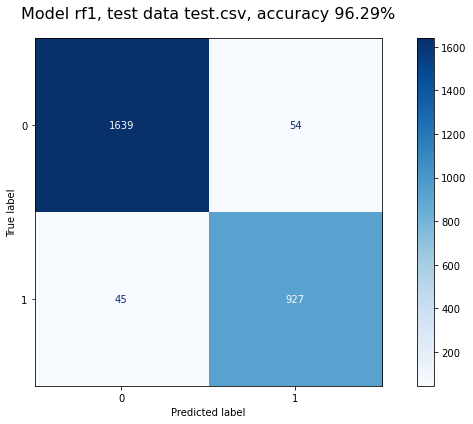

In [149]:
title = 'Model ' + model_name + ', test data test.csv, accuracy ' + str(np.round(accuracy * 100,2)) + '%'
fig, ax = plt.subplots(figsize=(10, 6))
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d', ax=ax)
plt.title(title, fontsize=16, pad=20)
#plt.savefig('../images/fig18.jpg', dpi=200);
plt.tight_layout()
plt.show()

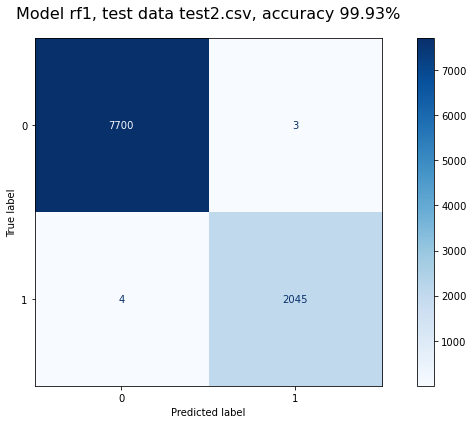

In [150]:
title2 = 'Model ' + model_name + ', test data test2.csv, accuracy ' + str(np.round(accuracy2 * 100,2)) + '%'
fig, ax = plt.subplots(figsize=(10, 6))
plot_confusion_matrix(gs, X_test2, y_test2, cmap='Blues', values_format='d', ax=ax)
plt.title(title2, fontsize=16, pad=20)
#plt.savefig('../images/fig18.jpg', dpi=200);
plt.tight_layout()
plt.show()